## Praca domowa 4

#### Autor: Imię Nazwisko

### Zadanie 1 (1.5 pkt)

Używając funkcji z pakietu `numpy` oraz `pandas` odpowiedz na poniższe pytania dotyczące zbioru danych o grach.

a) Wybierz gry, które zostały wydane po 2015 roku przez Nintendo oraz ich sprzedaż w Ameryce była niższa niż w Europie.  

b) Jak rodzaj gry zarobił najwięcej w roku 2010?

c) Jakie typy gier sprzedają się średnio lepiej w Japonii niż w Europie? Jakie to typy gier i jaka jest ta wartość średnia. Wynikiem powinna być tabelka posortowana względem średnich. Nazwij kolumny `Typ Gry` i `Średnia sprzedaż w Japonii`.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/R-Ladies-Warsaw/PoweR/master/Cz%C4%99%C5%9B%C4%87%202%20-%20Formatowanie%20danych/Python/data/vgsales.csv",
                delimiter = ",").dropna().reset_index(drop = True)

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [19]:
df.loc[(df.Publisher == "Nintendo") & (df.Year > 2015) & (df.NA_Sales < df.EU_Sales)]


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4199,4263,Mario & Sonic at the Rio 2016 Olympic Games,3DS,2016.0,Action,Nintendo,0.04,0.16,0.24,0.01,0.46
6477,6590,Mario & Sonic at the Rio 2016 Olympic Games,WiiU,2016.0,Action,Nintendo,0.03,0.11,0.10,0.01,0.26
14703,14971,Teddy Together,3DS,2016.0,Simulation,Nintendo,0.00,0.02,0.00,0.00,0.02


In [35]:
df2 = df[(df.Year == 2010)]
df2.groupby(["Genre"]).Global_Sales.sum().to_frame().reset_index().sort_values('Global_Sales', ascending=False).head(1)

,Genre,Global_Sales
0,Action,117.64


In [65]:
JP = df.groupby(["Genre"]).JP_Sales.mean().to_frame().reset_index()
EU = df.groupby(["Genre"]).EU_Sales.mean().to_frame().reset_index()
df5 = JP.merge(EU, on = "Genre")
df5 = df5.loc[(df5.JP_Sales > df5.EU_Sales)].reset_index()
df5 = df5.rename(columns = {'Genre' : "Typ Gry",
                     'JP_Sales' : "Średnia sprzedaż w Japonii"})
df5 = df5[["Typ Gry", "Średnia sprzedaż w Japonii"]].sort_values('Średnia sprzedaż w Japonii').reset_index(drop = True)
df5

,Typ Gry,Średnia sprzedaż w Japonii
0,Strategy,0.073284
1,Puzzle,0.099439
2,Role-Playing,0.238293


### Zadanie 2 (3.5 pkt)

Wykorzystując narzędzie do wizualizacji w Pythonie (matplotlib, seaborn) należy poprawić wykres, który był rozwiązaniem pracy domowej 2 (najlepiej poprawić swoją pracę domową, ale można też cudzą).

Rozwiązanie powinno zawierać:

1) oryginalny wykres wraz ze źródłem

2) wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił (kod nie jest potrzebny)

3) poprawiony wykres z punktu 2) w Pythonie

4) uzasadnienie, czemu wykres w Pythonie jest lepszy od dwóch pozostałych.

### Oryginalny wykres wraz ze źródłem

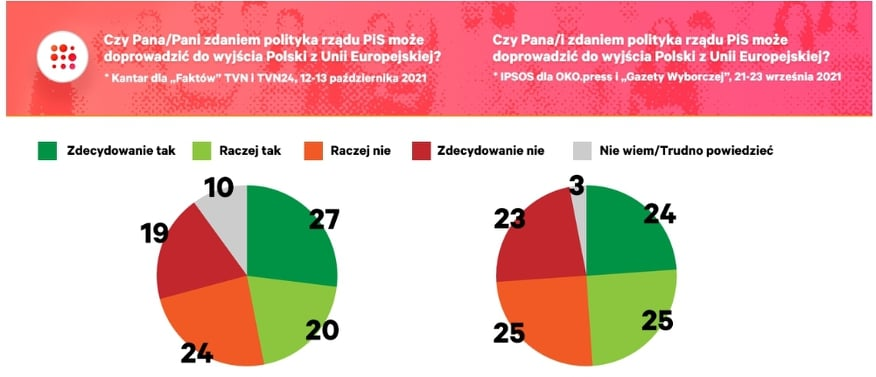

Źródło: https://next.gazeta.pl/nextnext/7,162552,27730904,im-bardziej-pis-walczy-z-ue-tym-mocniej-polacy-sa-do-niej-przywiazani.html

### Wykres w ggplot2 wraz z linkiem do pracy domowej w której się on pojawił 

Link: https://github.com/mini-pw/2022Z-DataVisualizationTechniques/blob/main/homeworks/hw2/AndrzejczukMaja/Andrzejczuk_Maja_pd2.html

### Wykres w matplotlib


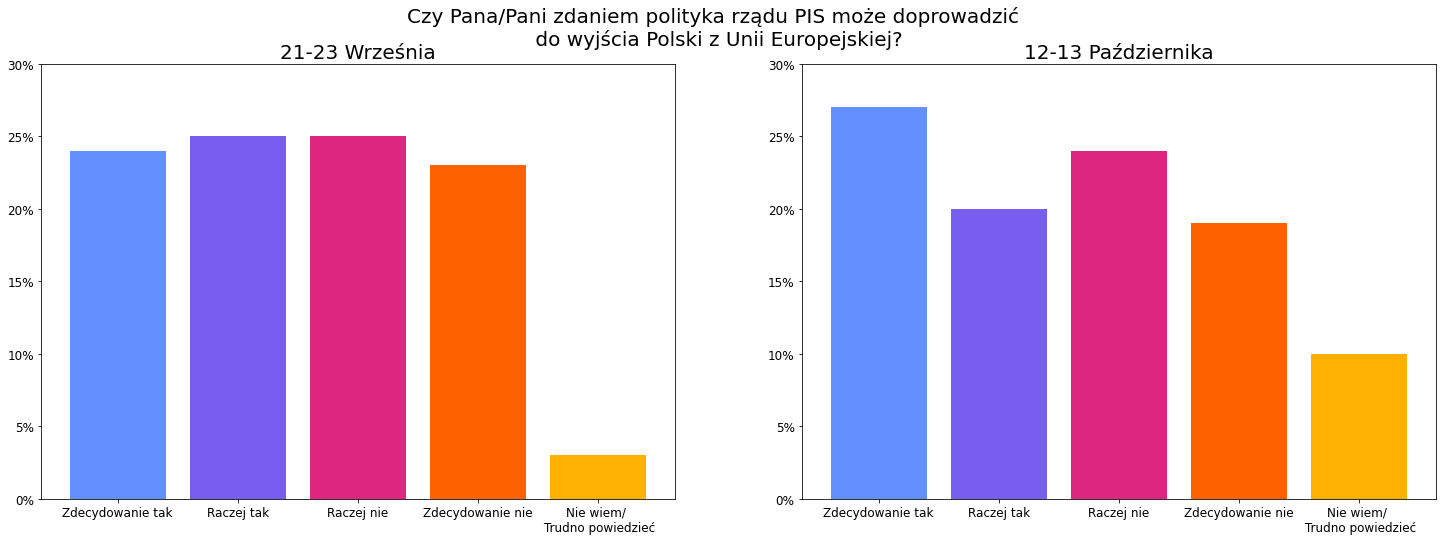

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Odpowiedź = ("Zdecydowanie tak", "Raczej tak","Raczej nie", "Zdecydowanie nie","Nie wiem/ \n Trudno powiedzieć")
Liczba = ( 0.24,  0.25, 0.25, 0.23, 0.03)
Liczba2 =(0.27, 0.20, 0.24, 0.19, 0.10)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Czy Pana/Pani zdaniem polityka rządu PIS może doprowadzić \n do wyjścia Polski z Unii Europejskiej?', size = 20)
ax1.bar(Odpowiedź, Liczba, color=['#648fff', '#785ef0', '#dc267f', '#fe6100', '#ffb000'])
ax2.bar(Odpowiedź, Liczba2, color=['#648fff', '#785ef0', '#dc267f', '#fe6100', '#ffb000'])
fig.set_size_inches(25, 8)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals], size = 14)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in vals], size = 14)
ax1.set_title('21-23 Września', size = 20)
ax2.set_title('12-13 Października', size = 20)
ax1.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
ax1.set(ylim=(0, 0.30))
ax2.set(ylim=(0, 0.30))
plt.show()





### Krótkie uzasadnienie:

Zmiana względem wykresu kołowego - Wybrałam bardziej odpowiedni typ wykresu. Łatwiej porównać wartości procentowe pomiędzy konkretnymi odpowiedziami jak i zmiane jaka nastąpiła pomiędzy wrześniem, a październikiem. Zmieniłam również kolejność pokazania wykresów, aby była chronologiczna (najpierw z września, potem z października).

Zmiana względem poprawionego wykresu - Rozdzieliłam wykres na 2, żeby łatwiej było odczytywać i porównywać odpowiedzi z ankiety w jednym terminie (nie trzeba szukać jaki kolor odpowiada za jaką odpowiedź). Aby łatwo było porównywać zmiany w odpowiedziach między dwoma ankietami tym samym kolorem zaznaczyłam słupki, które odpowiadają za tą samą odpowiedź. Palete zmieniłam na odpowiednią dla daltonistów. Dodatkowo na moim wykresie tym razem słupki zaczynają się od początku osi.